# Set-up

In [101]:
import math 
import tqdm
import tqdm.notebook
import random
from typing import List, Tuple, Callable, TypeVar
import numpy as np
import scipy.stats as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime 

# Linear algebra

## Vectors

In [2]:
Vector = List[float]

height_weight_age = [70,170,40]
grades = [95,80,75,62]

In [3]:
def add(v: Vector, w: Vector) -> Vector:
    '''Adds corresponding elements'''
    assert len(v) == len(w), 'vectors must be the same length'
    return [v_i + w_i for v_i, w_i in zip(v, w)]
assert add([1,2,3], [4,5,6]) == [5,7,9]

In [4]:
def subtract(v: Vector, w: Vector) -> Vector:
    '''Subtracts corresponsing elements'''
    assert len(v) == len(w), 'vectors must be the same length'
    return [v_i - w_i for v_i, w_i in zip(v, w)]
assert subtract([5,7,9], [4,5,6]) == [1,2,3]

In [5]:
def vector_sum(vectors: List[Vector]) -> Vector:
    '''Sums all corresponding elements'''
    # check that vectors is not empty 
    assert vectors, 'no vectors provided'
    
    # check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), 'different sizes'
    
    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]
assert vector_sum([[1,2],[3,4],[5,6],[7,8]]) == [16,20]

In [6]:
sum([np.array([1,2]),np.array([3,4]),np.array([5,6]),np.array([7,8])])

array([16, 20])

In [7]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    '''Multiplies every element by c'''
    return [c * v_i for v_i in v]
assert scalar_multiply(2, [1,2,3]) == [2,4,6]

In [8]:
np.array([1,2,3]) * 2

array([2, 4, 6])

In [9]:
def vector_mean(vectors: List[Vector]) -> Vector:
    '''Computes the element-wise average'''
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))
assert vector_mean([[1,2],[3,4],[5,6]]) == [3,4]

In [10]:
np.mean(np.array([1,2,3,4,5,6]).reshape(3,2), axis = 0)

array([3., 4.])

In [11]:
def dot(v: Vector, w: Vector) -> float:
    '''Computes dot product'''
    assert len(v) == len(w), 'vectors must be same length'
    
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
assert dot([1,2,3],[4,5,6]) == 1 * 4 + 2 * 5 + 3 * 6

In [12]:
def sum_of_squares(v: Vector) -> float:
    '''Returns sum of squares of a vector'''
    return dot(v, v)
assert sum_of_squares([1,2,3]) == 1 ** 2 + 2 ** 2 + 3 ** 2

In [13]:
def magnitude(v: Vector) -> float:
    '''Returns the magnitude (or length) of vector'''
    return math.sqrt(sum_of_squares(v))
assert magnitude([3,4]) == 5

In [14]:
def squared_distance(v: Vector, w: Vector) -> float:
    '''Returns squared distance of two vectors'''
    return sum_of_squares(subtract(v, w))

In [15]:
def distance(v: Vector, w: Vector) -> float:
    '''Returns the distance between two vectors'''
    return math.sqrt(squared_distance(v, w))

In [16]:
def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))
assert distance([1,2],[2,3]) == math.sqrt((1-2)**2 + (2-3)**2)

## Matrices

In [17]:
Matrix = List[List[float]]

A = [[1,2,3],[4,5,6]]
B = [[1,2],[3,4],[5,6]]

In [18]:
def shape(A: Matrix) -> Tuple[int, int]:
    '''Returns number of rows and columns of matrix'''
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols 
assert shape([[1,2,3],[4,5,6]]) == (2,3)

In [19]:
def get_row(A: Matrix, i: int) -> Vector:
    '''Returns the i-th row of the matrix as a vector'''
    return A[i]
def get_column(A: Matrix, i: int) -> Vector:
    '''Returns the j-th column of the matrix as a vector'''
    return [A_i[j] for A_i in A]

In [20]:
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    '''Returns a num_rows x num_cols matrix'''
    return [[entry_fn(i, j) 
             for j in range(num_cols)]
            for i in range(num_rows)]

In [21]:
def identity_matrix(n: int) -> Matrix:
    '''Returns the n x n identity matrix'''
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)
assert identity_matrix(3) == [[1,0,0],
                              [0,1,0],
                              [0,0,1]]

# Omitted variable bias

**OVB** =
- Effect of treatment in short - effect of treatment in long 
- beta short - beta long 
- relationship between omitted and treatment x effect of omitted in long

In [22]:
df = sm.datasets.randhie.load_pandas().data
df

,mdvis,lncoins,idp,lpi,fmde,physlm,disea,hlthg,hlthf,hlthp
0,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
1,2,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
2,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
3,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
4,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0
...,...,...,...,...,...,...,...,...,...,...
20185,2,0.000000,0,5.377498,0.000000,0.144292,10.57626,0,0,0
20186,0,0.000000,0,5.377498,0.000000,0.144292,10.57626,0,0,0
20187,8,3.258096,0,6.874819,8.006368,0.144292,10.57626,0,0,0
20188,8,3.258096,0,5.156178,6.542472,0.144292,10.57626,0,0,0


In [23]:
print(sm.datasets.randhie.NOTE)

::

    Number of observations - 20,190
    Number of variables - 10
    Variable name definitions::

        mdvis   - Number of outpatient visits to an MD
        lncoins - ln(coinsurance + 1), 0 <= coninsurance <= 100
        idp     - 1 if individual deductible plan, 0 otherwise
        lpi     - ln(max(1, annual participation incentive payment))
        fmde    - 0 if idp = 1; ln(max(1, MDE/(0.01 coinsurance))) otherwise
        physlm  - 1 if the person has a physical limitation
        disea   - number of chronic diseases
        hlthg   - 1 if self-rated health is good
        hlthf   - 1 if self-rated health is fair
        hlthp   - 1 if self-rated health is poor
        (Omitted category is excellent self-rated health)



In [24]:
long_lm = smf.ols(formula = 'mdvis ~ lncoins + idp', data = df).fit()
short_lm = smf.ols(formula = 'mdvis ~ lncoins', data = df).fit()
omi_lm = smf.ols(formula = 'idp ~ lncoins', data = df).fit()

In [25]:
short_lm.params['lncoins'] - long_lm.params['lncoins']

0.04094676829074495

In [26]:
omi_lm.params['lncoins'] * long_lm.params['idp']

0.04094676829074513

In [27]:
long_lm = smf.ols(formula = 'mdvis ~ lncoins + idp + lpi + fmde', data = df).fit()
short_lm = smf.ols(formula = 'mdvis ~ lncoins + lpi + fmde', data = df).fit()
omi_lm = smf.ols(formula = 'idp ~ lncoins + lpi + fmde', data = df).fit()

In [28]:
short_lm.params['lncoins'] - long_lm.params['lncoins']

0.06802680182337317

In [29]:
omi_lm.params['lncoins'] * long_lm.params['idp']

0.06802680182337166

# Linearity

# Bivariate regression and covariance

In [30]:
bi_lm = smf.ols(formula = 'mdvis ~ lncoins', data = df).fit()
bi_lm.params

Intercept    3.141148
lncoins     -0.158236
dtype: float64

In [31]:
np.mean(df.mdvis) - bi_lm.params['lncoins'] * np.mean(df.lncoins)

3.1411484061092625

In [32]:
np.cov(np.array([df.mdvis, df.lncoins]))[0][1] / np.var(df.lncoins)

-0.1582441097715173

# Residuals

In [33]:
lm = smf.ols(formula = 'mdvis ~ lncoins + idp + lpi + fmde', data = df).fit()
lm.resid

0       -2.644642
1       -0.644642
2       -2.644642
3       -2.644642
4       -2.644642
           ...   
20185   -1.846313
20186   -3.846313
20187    5.408944
20188    5.414937
20189    3.435715
Length: 20190, dtype: float64

## Mean zero

In [34]:
lm.resid.mean().round(decimals = 10)

0.0

In [35]:
df_new = df.assign(resid = lm.resid, pre = lm.predict()) 
df_new

,mdvis,lncoins,idp,lpi,fmde,physlm,disea,hlthg,hlthf,hlthp,resid,pre
0,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0,-2.644642,2.644642
1,2,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0,-0.644642,2.644642
2,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0,-2.644642,2.644642
3,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0,-2.644642,2.644642
4,0,4.615120,1,6.907755,0.000000,0.000000,13.73189,1,0,0,-2.644642,2.644642
...,...,...,...,...,...,...,...,...,...,...,...,...
20185,2,0.000000,0,5.377498,0.000000,0.144292,10.57626,0,0,0,-1.846313,3.846313
20186,0,0.000000,0,5.377498,0.000000,0.144292,10.57626,0,0,0,-3.846313,3.846313
20187,8,3.258096,0,6.874819,8.006368,0.144292,10.57626,0,0,0,5.408944,2.591056
20188,8,3.258096,0,5.156178,6.542472,0.144292,10.57626,0,0,0,5.414937,2.585063


## Uncorrelated with regressors and predictions

In [36]:
resid_lm = smf.ols(formula = 'resid ~ lncoins + idp + lpi + fmde', data = df_new).fit()
resid_lm.params.round(decimals = 10)

Intercept   -0.0
lncoins      0.0
idp          0.0
lpi         -0.0
fmde         0.0
dtype: float64

In [37]:
pre_lm = smf.ols(formula = 'resid ~ pre', data = df_new).fit()
pre_lm.params.round(decimals = 10)

Intercept    0.0
pre         -0.0
dtype: float64

# Dummies

## Dummies in bivariate regression

In [38]:
dum_lm = smf.ols(formula = 'mdvis ~ idp', data = df).fit()
dum_lm.params

Intercept    2.996453
idp         -0.523220
dtype: float64

In [39]:
df[df['idp'] == 0].mdvis.mean()

2.9964527140084334

In [40]:
df[df['idp'] == 1].mdvis.mean() - df[df['idp'] == 0].mdvis.mean()

-0.5232197172471453

# Regression anatomy

## Parameters

In [41]:
ana_lm = smf.ols(formula = 'mdvis ~ lncoins + idp + lpi', data = df).fit()
ana_res_lm = smf.ols(formula = 'lncoins ~ idp + lpi', data = df).fit()

In [42]:
ana_lm.params

Intercept    3.218183
lncoins     -0.236384
idp         -0.832246
lpi          0.059044
dtype: float64

In [43]:
np.cov(df.mdvis, ana_res_lm.resid)[0][1] / np.var(ana_res_lm.resid)

-0.2363961829157149

# Logs

In [44]:
log_lm = smf.ols(formula = 'np.log(mdvis) ~ lncoins', data = df[df.mdvis != 0]).fit()
log_lm.params['lncoins'].round(3) * 100

-2.7

In [45]:
(log_lm.predict(exog = {'lncoins':2.5}) - log_lm.predict(exog = {'lncoins':1.5})) / log_lm.predict(exog = {'lncoins':1.5}).round(3) * 100

0   -2.600802
dtype: float64

# Standard error and confidence interval

## SE formula for bivariate regression

In [46]:
seb_lm = smf.ols(formula = 'mdvis ~ lncoins', data = df).fit()

In [47]:
seb_lm.params

Intercept    3.141148
lncoins     -0.158236
dtype: float64

In [48]:
seb_lm.bse

Intercept    0.042431
lncoins      0.015946
dtype: float64

In [49]:
seb_lm.conf_int()

,0,1
Intercept,3.057981,3.224316
lncoins,-0.189491,-0.126981


In [50]:
np.std(seb_lm.resid) / np.sqrt(len(df)) / np.std(df.lncoins)

0.015945074249450204

## SE formula for multivariate regression

In [51]:
sem_lm = smf.ols(formula = 'mdvis ~ lncoins + idp + lpi', data = df).fit()

In [52]:
sem_lm.params

Intercept    3.218183
lncoins     -0.236384
idp         -0.832246
lpi          0.059044
dtype: float64

In [53]:
sem_lm.bse

Intercept    0.065508
lncoins      0.018399
idp          0.076638
lpi          0.013200
dtype: float64

In [54]:
sem_lm.conf_int()

,0,1
Intercept,3.089783,3.346584
lncoins,-0.272447,-0.200321
idp,-0.982462,-0.682030
lpi,0.033171,0.084917


In [55]:
sem_res_lm = smf.ols(formula = 'lncoins ~ idp + lpi', data = df).fit()

In [56]:
np.std(sem_lm.resid) / np.sqrt(len(df)) / np.std(sem_res_lm.resid)

0.018396901253716645

# RSS - Residual sum of squares

In [57]:
lm = smf.ols(formula = 'mdvis ~ lncoins + idp + lpi', data = df).fit()

In [58]:
lm.ssr

405198.90608648356

In [59]:
((lm.predict() - df.mdvis) ** 2).sum()

405198.9060864836

# Plots

In [60]:
sm.graphics

<module 'statsmodels.graphics.api' from '/Users/boyuan/anaconda3/envs/sds/lib/python3.8/site-packages/statsmodels/graphics/api.py'>

# From scratch

## Simple regression

In [61]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha 

def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    '''The error from predicting beta * x_i + alpha when the actual value is y_i'''
    return predict(alpha, beta, x_i) - y_i

def sum_of_sqerrors(alpha: float, beta: float, x: List[float], y: List[float]) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [64]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

def least_squares_fit(x: List[float], y: List[float]) -> Tuple[float, float]:
    '''Given two vectors x and y, find the least-squares values of alpha and beta'''
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [65]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

least_squares_fit(x, y)

(-5.0, 3.0)

In [66]:
def total_sum_of_squares(y: List[float]) -> float:
    '''the total squared variation of y_i from their mean'''
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha: float, beta: float, x: List[float], y: List[float]) -> float:
    '''the fraction of variation in y captured by the model, which equals 1 - the fraction of variation in y not captured by the model'''
    return 1 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))

In [68]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [74]:
num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]
learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess
        
        # partial derivative of loss with respect to alpha 
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                     for x_i, y_i in zip(x, y))
        # partial derivative of loss with respect to beta 
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                     for x_i, y_i in zip(x, y))
        # compute loss
        loss = sum_of_sqerrors(alpha, beta, x, y)
        t.set_description(f"loss: {loss:.3f}")
        # update guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

alpha, beta = guess
alpha, beta

loss: 0.838:  79%|███████▉  | 7920/10000 [00:07<00:01, 1188.93it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

loss: 0.161: 100%|██████████| 10000/10000 [00:09<00:00, 1064.07it/s]


(-4.912436809607385, 2.9999999999999996)

## Multiple regression

In [75]:
def predict(x: Vector, beta: Vector) -> float:
    '''assumes that the first element of x is 1'''
    return dot(x, beta)

In [76]:
def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

In [77]:
x = [1,2,3]
y = 30
beta = [4,4,4]
error(x, y, beta)

-6

In [78]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

sqerror_gradient(x, y, beta)

[-12, -24, -36]

In [79]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [80]:
def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    '''Find the beta that minimizes the sum of squared errors assuming the model y = dot(x, beta)'''
    # Start with random guess
    guess = [random.random() for _ in xs[0]]
    
    for _ in tqdm.trange(num_steps, desc = 'least squares fit'):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start: start + batch_size]
            batch_ys = ys[start: start + batch_size]
            
            gradient = vector_mean([sqerror_gradient(x, y, guess)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)
    return guess

In [81]:
def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2
                                for x, y, in zip(xs, ys))
    return 1 - sum_of_squared_errors / total_sum_of_squared(ys)

### Bootstrap

In [84]:
X = TypeVar('X')
Stat = TypeVar('Stat')

def bootstrap_sample(data: List[X]) -> List[X]:
    '''randomly samples len(data) elements with replacement'''
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    '''evaluates stats_fn on num_samples bootstrap samples from data'''
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [86]:
close_to_100 = [99.5 + random.random() for _ in range(101)]

far_from_100 = ([99.5 + random.random()] + 
                [random.random() for _ in range(50)] + 
                [200 + random.random() for _ in range(50)])

In [89]:
np.median(close_to_100), np.median(far_from_100)

(100.08761706417543, 100.23148922079085)

In [90]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

(array([ 1.,  4.,  4., 20., 36., 29.,  1.,  2.,  2.,  1.]),
 array([ 99.97659695,  99.9994656 , 100.02233424, 100.04520289,
        100.06807153, 100.09094018, 100.11380882, 100.13667747,
        100.15954611, 100.18241476, 100.2052834 ]),
 <a list of 10 Patch objects>)

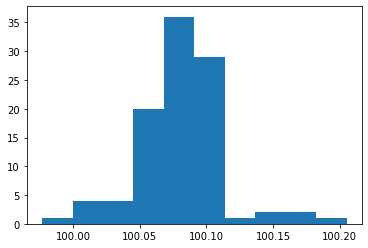

In [99]:
plt.hist(bootstrap_statistic(close_to_100, median, 100))

(array([42.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0., 49.]),
 array([  0.68058913,  20.64597039,  40.61135164,  60.5767329 ,
         80.54211416, 100.50749541, 120.47287667, 140.43825792,
        160.40363918, 180.36902043, 200.33440169]),
 <a list of 10 Patch objects>)

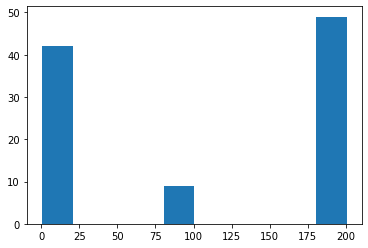

In [100]:
plt.hist(bootstrap_statistic(far_from_100, median, 100))

### Standard errors of coefficients

In [103]:
def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
    x_sample = [x for x, _ in pairs]
    y_sample = [y for _, y in pairs]
    beta = least_squares_fit(x_sample, y_sample, learning_rate, 5000, 25)
    print('bootstrap sample', beta)
    return beta

In [ ]:
random.seed(0)
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)), estimate_sample_beta, 100)

In [ ]:
bootstrap_standard_errors = [standard_deviation([beta[i] for beta in bootstrap_betas])
                             for i in range(4)]
print(bootstrap_standard_errors)

In [ ]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
    if beta_hat_j > 0:
        return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
    else:
        return 2 * normal_cdf(beta_hat_j / sigma_hat_j)

## Regularization

In [104]:
def ridge_penalty(beta: Vector, alpha: float) -> float:
    return alpha * dot(beta[1:], beta[1:])

In [105]:
def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    '''estimate error plus ridge penalty on beta'''
    return error(x, y, beta) ** 2 + ridge_penalty(beta, alpha)

In [106]:
def ridge_penalty_gradient(beta: Vector, alpha: float) -> Vector:
    '''gradient of just the ridge penalty'''
    return [0.] + [2 * alpha * beta_j for beta_j in beta[1:]]

def sqerror_ridge_gradient(x: Vector,
                           y: float,
                           beta: Vector,
                           alpha: float) -> Vector:
    '''the gradient corresponding to the ith squared error term including the ridge penalty'''
    return add(sqerror_gradient(x, y, beta),
               ridge_penalty_gradient(beta, alpha))

In [107]:
def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])